# Importações

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Pré-processamento

In [3]:
dadosMedicos = pd.read_csv(rf'..\2015.csv', sep=';')
dadosMedicos

C:\Users\isabe\AppData\Local\Temp\ipykernel_2836\219197495.py:1: DtypeWarning: Columns (96,97,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  dadosMedicos = pd.read_csv(rf'..\2015.csv', sep=';')


,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
0,120000,2015,1,1,6.360294e+13,1215100018110,1,69900970,120040,19691208,...,NaN,1,0,0,0,0,0,0,0,0
1,120000,2015,1,1,6.360294e+13,1215100018198,1,69900970,120040,19730513,...,NaN,1,0,0,0,0,0,0,0,0
2,120000,2015,1,1,6.360294e+13,1215100018341,1,69921000,120080,19530312,...,NaN,1,0,0,0,0,0,0,0,0
3,120000,2015,1,1,6.360294e+13,1215100018363,1,69900970,120040,19910618,...,NaN,1,0,0,0,0,0,0,0,0
4,120000,2015,1,1,6.360294e+13,1215100018385,1,69960000,120030,19950619,...,NaN,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,110000,2015,2,1,6.074262e+13,1115500004542,1,76900100,110012,19460501,...,NaN,0,0,0,0,0,0,0,0,0
1048571,110000,2015,2,1,6.074262e+13,1115500004553,1,76868000,110013,19560826,...,NaN,0,0,0,0,0,0,0,0,0
1048572,110000,2015,2,1,6.074262e+13,1115500004510,1,76801000,110020,19510602,...,NaN,0,0,0,0,0,0,0,0,0
1048573,110000,2015,2,1,4.287520e+12,1115100053254,1,76801000,110020,19711106,...,NaN,0,0,0,0,0,0,0,0,0


In [ ]:
data = dadosMedicos.copy()

# Remover colunas inteiras vazias
data = data.dropna(how='all', axis=1)

# Remover colunas com todos os valores iguais
colunas_com_valores_unicos = data.nunique() == 1
if colunas_com_valores_unicos.any():
    data = data.drop(data.columns[colunas_com_valores_unicos], axis=1)

# # Remover algumas colunas específicas
# data = data.drop(columns=['DIAS_PERM', 'NASC', 'CEP', 'MES_CMPT', 'NATUREZA', 'TPDISEC5', 'DIAR_ACOM', 'SEQUENCIA', 'REMESSA', 'VAL_SH', 'VAL_SP', 'VAL_TOT', 'US_TOT', 'VAL_SH_FED', 'VAL_SP_FED', 'VAL_SH_GES', 'VAL_SP_GES', 'VAL_UCI'])

# Considerar apenas financiamento Faec (04)
mask = data['FINANC'] != 4
data = data.drop(data[mask == True].index)

data = data[['CEP', 'MUNIC_MOV', 'PROC_REA', 'DIAG_PRINC', 'DIAGSEC1', 'DIAGSEC2', 'DIAGSEC3', 'DIAGSEC4', 'MORTE', 'CNES', 'QT_DIARIAS', 'VAL_TOT']]

# # Remover idades zeradas
# mask = data['IDADE'] != 0
# data = data.drop(data[mask == False].index)

#Transformar dados string em numéricos
obj_cols = list(data.select_dtypes(include='object').columns)
data[obj_cols] = data[obj_cols].apply(lambda x: x.str.replace(',','.'))
data['VAL_TOT'] = data['VAL_TOT'].astype(float)

# Preencher células vazias com 0
data = data.fillna(0)

data

,CEP,MUNIC_MOV,PROC_REA,VAL_TOT,DIAG_PRINC,DIAGSEC1,DIAGSEC2,DIAGSEC3,DIAGSEC4,MORTE,CNES,QT_DIARIAS
6,69945000,120040,404010032,353.22,J351,W199,0,0,0,0,2001586,2
7,69950000,120040,404010482,247.46,J342,W199,0,0,0,0,2001586,1
9,69900970,120040,407020276,254.12,K605,W199,0,0,0,0,2001586,1
10,69900970,120040,401020070,143.72,L720,W199,0,0,0,0,2001586,1
11,69900970,120040,407030026,741.11,K800,W199,0,0,0,0,2001586,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,76801000,110020,405050372,651.00,H251,0,0,0,0,0,2807092,1
1048570,76900100,110020,405050372,651.00,H251,0,0,0,0,0,2807092,1
1048571,76868000,110020,405050372,643.00,H251,0,0,0,0,0,2807092,1
1048572,76801000,110020,405050372,651.00,H251,0,0,0,0,0,2807092,1


In [4]:
def encontrar_indice_true(lista):
  for indice, valor in enumerate(lista):
    if valor == True:
      print(colunas_com_valores_unicos.index[indice])


# Exemplo de uso
encontrar_indice_true(colunas_com_valores_unicos)

ANO_CMPT
IDENT
UTI_MES_IN
UTI_MES_AN
UTI_MES_AL
UTI_INT_IN
UTI_INT_AN
UTI_INT_AL
VAL_SADT
VAL_RN
VAL_ACOMP
VAL_ORTP
VAL_SANGUE
VAL_SADTSR
VAL_TRANSP
VAL_OBSANG
VAL_PED1AC
DIAG_SECUN
RUBRICA
CAR_INT
TOT_PT_SP
SEQ_AIH5
CID_ASSO
CID_MORTE
DIAGSEC5
TPDISEC6
TPDISEC7
TPDISEC8
TPDISEC9


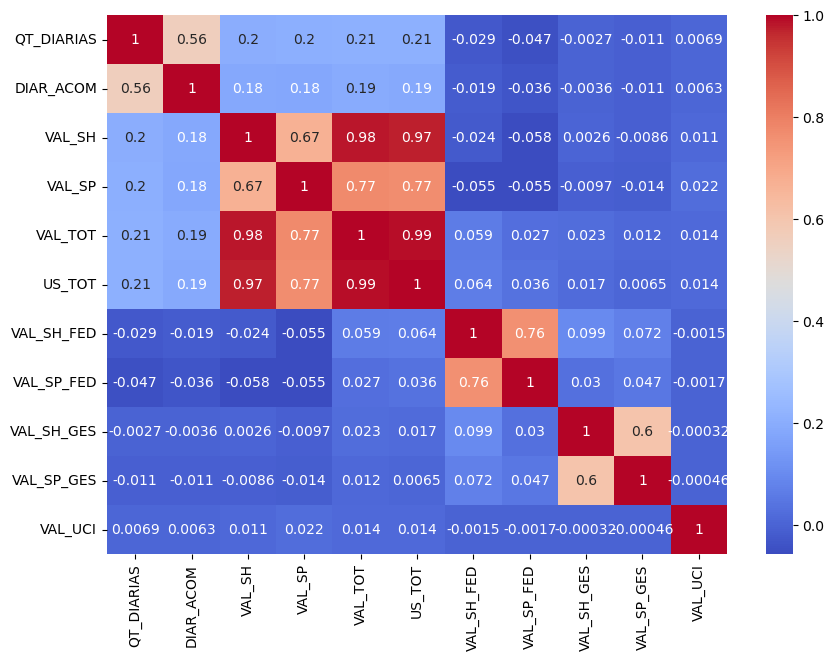

In [5]:
correlacao = dadosMedicos.copy()
correlacao = correlacao[['QT_DIARIAS', 'DIAR_ACOM', 'VAL_SH', 'VAL_SP', 'VAL_TOT', 'US_TOT', 'VAL_SH_FED', 'VAL_SP_FED', 'VAL_SH_GES', 'VAL_SP_GES', 'VAL_UCI']]
correlacao[['VAL_SH', 'VAL_SP', 'VAL_TOT', 'US_TOT', 'VAL_SH_FED', 'VAL_SP_FED', 'VAL_SH_GES', 'VAL_SP_GES', 'VAL_UCI']] = correlacao[['VAL_SH', 'VAL_SP', 'VAL_TOT', 'US_TOT', 'VAL_SH_FED', 'VAL_SP_FED', 'VAL_SH_GES', 'VAL_SP_GES', 'VAL_UCI']].apply(lambda x: x.str.replace(',','.'))
correlacao[['VAL_SH', 'VAL_SP', 'VAL_TOT', 'US_TOT', 'VAL_SH_FED', 'VAL_SP_FED', 'VAL_SH_GES', 'VAL_SP_GES', 'VAL_UCI']] = correlacao[['VAL_SH', 'VAL_SP', 'VAL_TOT', 'US_TOT', 'VAL_SH_FED', 'VAL_SP_FED', 'VAL_SH_GES', 'VAL_SP_GES', 'VAL_UCI']].astype(float)
correlation_matrix = correlacao.corr()

plt.figure(figsize=(10,7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.savefig('imagens/correlation_matrix_removal')
plt.show()


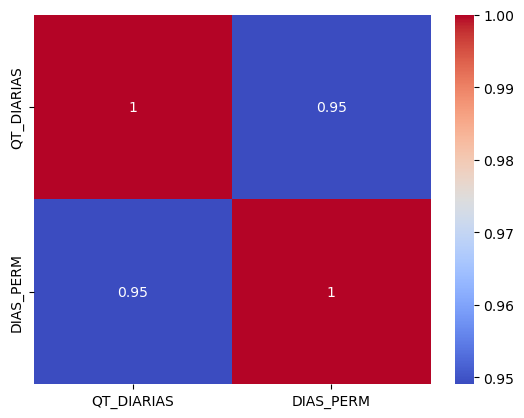

In [30]:
correlacao = dadosMedicos.copy()
correlacao = correlacao[['QT_DIARIAS', 'DIAS_PERM']]
correlation_matrix = correlacao.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.savefig('imagens/correlation_matrix_dias')
plt.show()

In [6]:
data.to_csv(rf'..\2015_python.csv')

# Aplicação de métodos de Machine Learning

In [12]:
import graphviz
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, export_graphviz

import shap

In [70]:
temp = data.copy()
y = temp['QT_DIARIAS'].copy()

temp = temp.drop(columns=['QT_DIARIAS', 'VAL_TOT'])

# Colunas Diagnóstico
colunas = ['DIAG_PRINC', 'DIAGSEC1', 'DIAGSEC2', 'DIAGSEC3', 'DIAGSEC4']

# Gera os dummies
dummies = pd.get_dummies(temp[colunas].astype(str))

# Agrupa por valor (ignorando o prefixo da coluna)
dummies.columns = dummies.columns.str.split('_').str[1]

# Faz o OR lógico entre colunas com o mesmo valor (ou seja, se apareceu em qualquer coluna)
dummies = dummies.groupby(level=0, axis=1).max()

# Resultado final (True/False ao invés de 1/0 se quiser)
dummies = dummies.astype(bool)

temp = pd.concat([temp, dummies], axis=1)
# temp = pd.get_dummies(temp)
temp = temp.drop(columns=colunas)
temp = temp.drop(columns=['0', 'PRINC'])
X = temp.copy()
X = X.astype(float)

C:\Users\isabe\AppData\Local\Temp\ipykernel_2836\1312602094.py:16: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  dummies = dummies.groupby(level=0, axis=1).max()


In [71]:
# fit model
single_split_model = DecisionTreeRegressor(max_depth=4)
single_split_model.fit(X, y)

DecisionTreeRegressor(max_depth=4)

In [72]:
explainer = shap.Explainer(single_split_model, X)
shap_values = explainer(X, check_additivity=False)

 97%|=================== | 223861/230509 [00:14<00:00]       

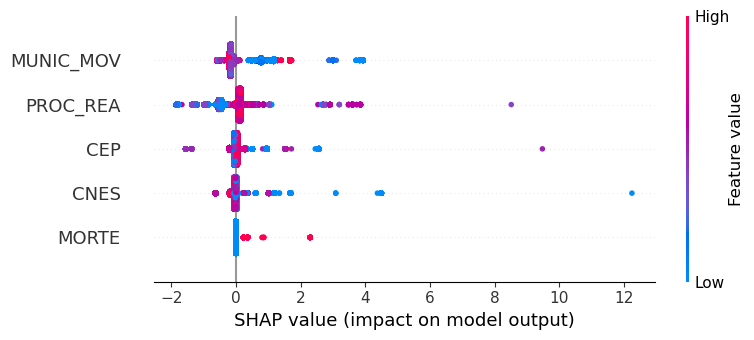

In [15]:
shap.summary_plot(shap_values, X)

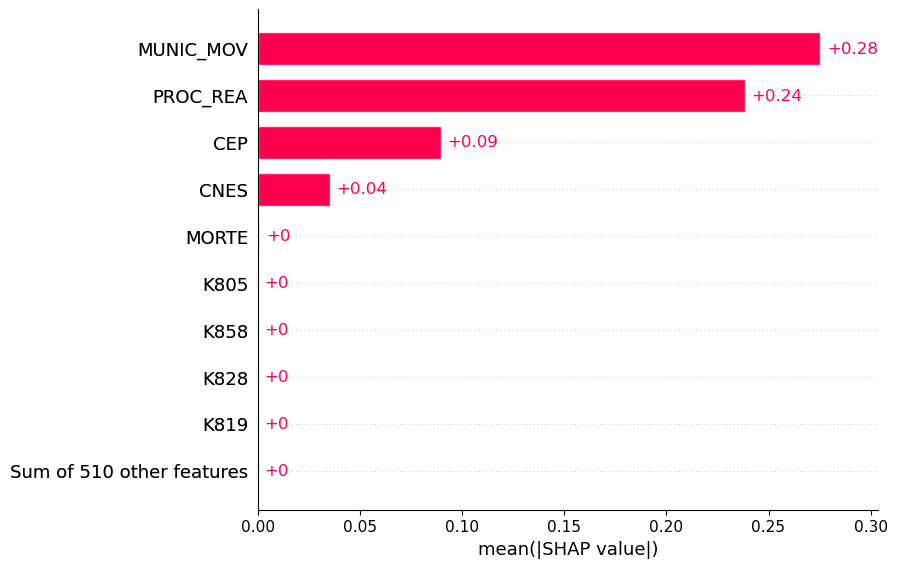

In [78]:
shap.plots.bar(shap_values)

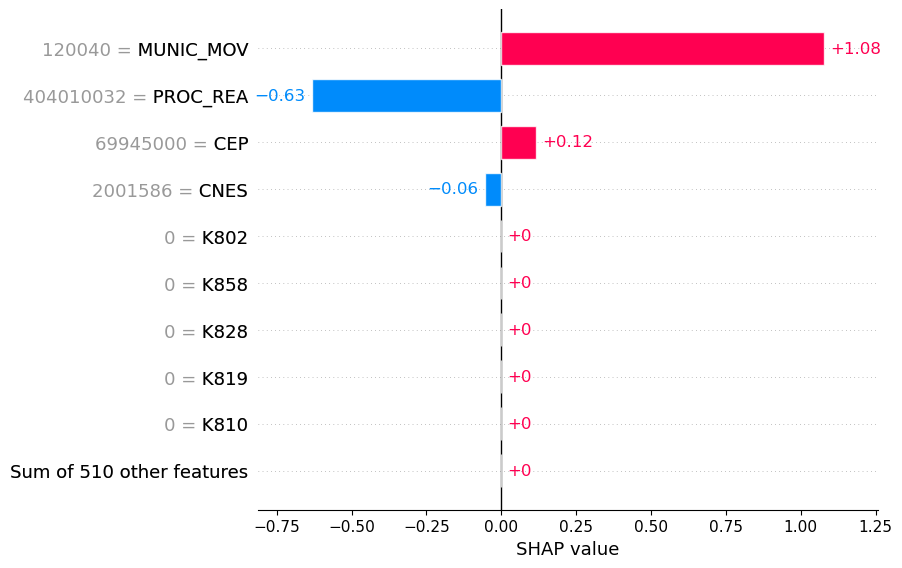

In [79]:
shap.plots.bar(shap_values[0])

# Avaliando apenas os diagnósticos

In [80]:
# fit model
single_split_model = DecisionTreeRegressor(max_depth=4)
single_split_model.fit(dummies, y)

explainer = shap.Explainer(single_split_model, dummies)
shap_values = explainer(dummies, check_additivity=False)

 96%|=================== | 221805/230509 [00:14<00:00]       

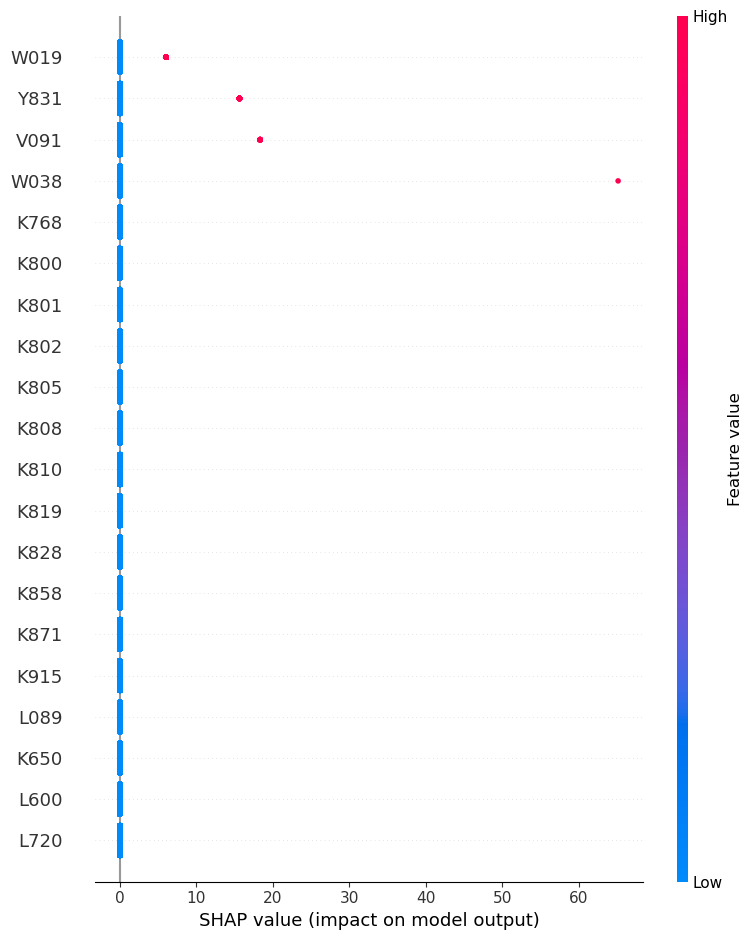

In [82]:
shap.summary_plot(shap_values, dummies)

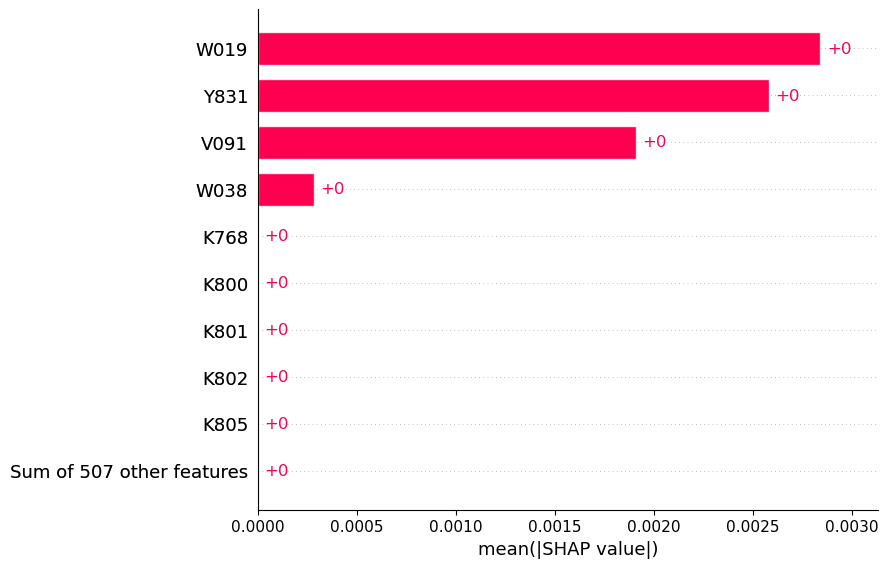

In [83]:
shap.plots.bar(shap_values)